In [ ]:
import pandas as pd
import numpy as np

urineDS=pd.read_csv("/content/drive/MyDrive/Grad2/lastUrine.csv")
urineDS=urineDS.iloc[:,1:]

from sklearn.preprocessing import StandardScaler


urineOutput=urineDS.iloc[2:,1:2]
urineInput=urineDS.iloc[2:,4:]

data = urineInput
scaler = StandardScaler()
scaler.fit(data)
urineInput=scaler.transform(data)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(urineInput, urineOutput, test_size=0.33, random_state=0)

In [ ]:
X_train=X_train.astype(np.float64)
X_test=X_test.astype(np.float64)
y_train=y_train.astype(np.float64)
y_test=y_test.astype(np.float64)

X_train=X_train.astype(np.int64)
y_train=y_train.astype(np.int64)
X_train=X_train.astype(np.float64)
y_train=y_train.astype(np.float64)
print(y_train)

     Unnamed: 1
231        46.0
20         52.0
169        25.0
254        50.0
126        73.0
..          ...
253        30.0
194        60.0
119        61.0
49         61.0
174        62.0

[201 rows x 1 columns]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten,concatenate

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
import keras
from matplotlib import pyplot as plt

model = Sequential()
model.add(Conv1D(256, 3, activation='relu', input_shape=(529, 1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.25))
model.add(Conv1D(64, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [ ]:
history =model.fit(X_train,y_train, batch_size=32, epochs=174, validation_split=0.1)

Epoch 1/174
6/6 [==============================] - 5s 682ms/step - loss: 40.5524 - mean_absolute_error: 40.5524 - val_loss: 22.3091 - val_mean_absolute_error: 22.3091
Epoch 2/174
6/6 [==============================] - 4s 750ms/step - loss: 23.2596 - mean_absolute_error: 23.2596 - val_loss: 23.4615 - val_mean_absolute_error: 23.4615
Epoch 3/174
6/6 [==============================] - 5s 867ms/step - loss: 21.2542 - mean_absolute_error: 21.2542 - val_loss: 22.1493 - val_mean_absolute_error: 22.1493
Epoch 4/174
6/6 [==============================] - 5s 800ms/step - loss: 18.2696 - mean_absolute_error: 18.2696 - val_loss: 20.1848 - val_mean_absolute_error: 20.1848
Epoch 5/174
6/6 [==============================] - 6s 979ms/step - loss: 17.0705 - mean_absolute_error: 17.0705 - val_loss: 20.6904 - val_mean_absolute_error: 20.6904
Epoch 6/174
6/6 [==============================] - 6s 1s/step - loss: 16.6622 - mean_absolute_error: 16.6622 - val_loss: 19.6130 - val_mean_absolute_error: 19.6130
E

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


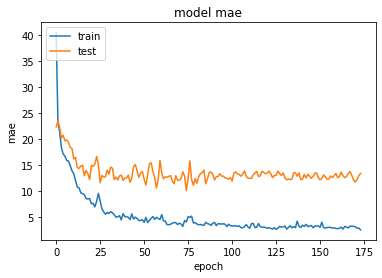

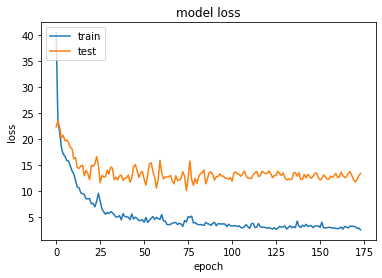

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
model.save('/content/drive/MyDrive/Grad2Models/yasEarly')

2.8.2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Grad2Models/yasEarly/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Grad2Models/yasEarly', compile=False)

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 527, 256)          1024      
                                                                 
 conv1d_1 (Conv1D)           (None, 525, 256)          196864    
                                                                 
 dropout (Dropout)           (None, 525, 256)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 262, 256)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 261, 128)          65664     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 261, 128)         0         
 1D)                                                    

In [ ]:
prediction=new_model.predict(X_test)


    

yout=y_test.to_numpy()    
counter=0
counter2=0
counter3=0
yout = yout. astype(int)
total=0
for i in range (prediction.shape[0]):
  if prediction[i]%1>=0.5:
    prediction[i]=int(prediction[i])+1
  else :
     prediction[i]=int(prediction[i])  

for i in range (prediction.shape[0]):
  if prediction[i]>yout[i]:
    total=total+prediction[i]-yout[i]
  else:
    total=total+yout[i]-prediction[i]

print("Hata Payı = %",total/100)   

Hata Payı = % [12.21]
